In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import csv
import scipy.stats  
from matplotlib import ticker

In [3]:
f = open("X:\\Всячина\\Математика\\Типовик_Статистика\\array4.csv",'r')
f.readline()
with f as File:
    reader = csv.reader(File)
    for row in reader:
        sample = pd.Series(row, dtype=float)

sample.name = 'sample'

In [4]:
print("Нам досталась выборка размером 1000 элементов")
print("Отсортируем элементы по значению:\n")

print("[", end = '')
for i in range(0,3):
    print(sample.values[i], end = " ")
print("...", end = ' ')
for i in range(997,999):
    print(sample.values[i], end = " ")
print(sample.values[999],end='')
print("]")

Нам досталась выборка размером 1000 элементов
Отсортируем элементы по значению:

[-6.29 2.36 -3.73 ... -1.63 -2.09 -2.93]


In [39]:
sum = 0
n = 1000
for i in sample.values:
    sum += i
E = sum/1000
deviation = 0
for i in sample.values:
    deviation += (i-E)**2
S = deviation/1000
S_unbiased = (1000/(1001.0))*S
print("Найдём выборочную дисперсию(S), исправленную и выборочное среднее(E):\n")
print("E =", E)
print("S =", S)
print("S_несм =", S_unbiased)

Найдём выборочную дисперсию(S), исправленную и выборочное среднее(E):

E = -1.4191899999999975
S = 7.6057176438999905
S_несм = 7.598119524375615


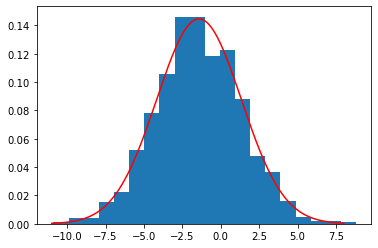

In [40]:
fig, ax = plt.subplots()
ax.hist(sample, bins = 20, density=True)
ax.plot(np.linspace(-11,8,1000), scipy.stats.norm.pdf(np.linspace(-11,8,1000),E,S**0.5), color='r')
plt.show()

In [94]:
a = 0.95
c = scipy.stats.norm.ppf((a+1)/2)
l = E-(S_unbiased*c*(n**0.5))/n
r = E+(S_unbiased*c*(n**0.5))/n

In [95]:
print(l, r)

-1.890117673606428 -0.948262326393567


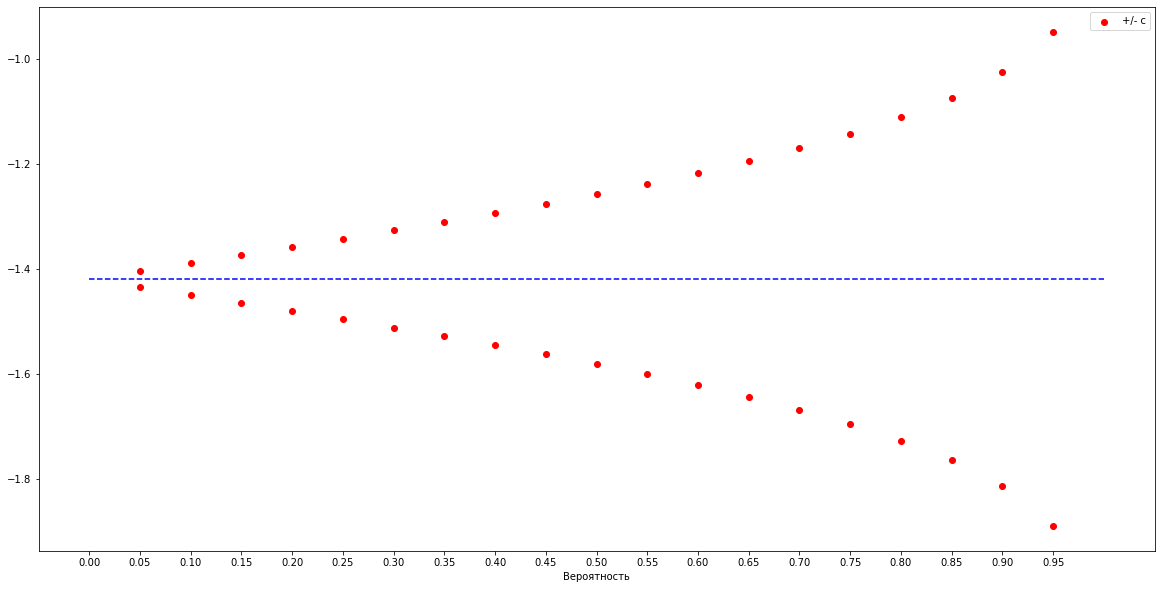

In [153]:
fig, ax = plt.subplots(figsize=(20,10))
x = np.arange(0.05,0.99, 0.05)
y = []
for i in x:
    c = scipy.stats.norm.ppf((i+1)/2)
    y.append(E-(S_unbiased*c*(n**0.5))/n)
    r = E+(S_unbiased*c*(n**0.5))/n
#     ax.scatter(i, l, c = 'r')
#     ax.scatter(i, r, c = 'r')
#     ax.plot([i]*100, np.linspace(l,r,100), c = 'b')

ax.scatter(x, y, c = 'r', label = '+/- c')

y = []
for i in x:
    c = scipy.stats.norm.ppf((i+1)/2)
    y.append(E+(S_unbiased*c*(n**0.5))/n)
    r = E+(S_unbiased*c*(n**0.5))/n

ax.scatter(x, y, c = 'r')
ax.plot(np.linspace(0, 1, 100), [E]*100, 'b--')
ax.legend()
ax.set_xlabel('Вероятность')
plt.xticks(ticks = np.arange(0, 1, 0.05))
plt.show()

,sample
0,998.780
1,985.382
2,1007.763
3,989.559
4,1010.907
...,...
9995,985.670
9996,1025.502
9997,990.772
9998,1006.769
